In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [11]:
class Perceptron:
    def __init__(self, learning_rate=0.1):
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = 0
        self.errors = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y, epochs=10):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(epochs):
            errors = 0
            for xi, yi in zip(X, y):
                linear_output = np.dot(xi, self.weights) + self.bias
                y_pred = self.sigmoid(linear_output)
                y_pred_class = 1 if y_pred >= 0.5 else -1

                update = self.learning_rate * (yi - y_pred_class)
                self.weights += update * xi
                self.bias += update

                errors += int(update != 0)

            self.errors.append(errors)

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_output)
        return np.where(y_pred >= 0.5, 1, -1)


In [3]:
# Start your main here ,read the iris data set
df = pd.read_excel('/content/Iris.xlsx')


X = df.iloc[0:100, 0:2].values
y = df.iloc[0:100, 4].values

In [4]:
# map the labels to a binary integer value
y = np.where(y == 'Iris-setsa', 1, -1)


In [5]:
# standardization of the input features
X = X.astype(float)

X[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()



In [6]:
# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)




In [7]:
# train the model by setting the learning rate as 0.01
model = Perceptron(learning_rate=0.01)
model.fit(X_train, y_train)

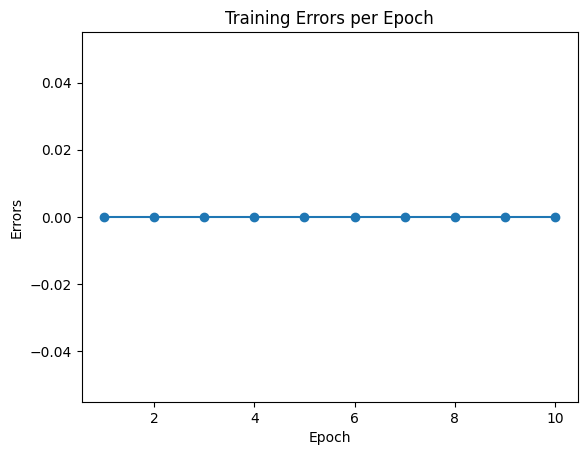

In [10]:
plt.plot(range(1, len(model.errors) + 1),model.errors, marker='o')

plt.xlabel("Epoch")
plt.ylabel("Errors")
plt.title("Training Errors per Epoch")
plt.show()


In [9]:
# print the accuracy
accuracy = accuracy_score(y_test, model.predict(X_test)) * 100
print("Accuracy:", accuracy, "%")


Accuracy: 100.0 %


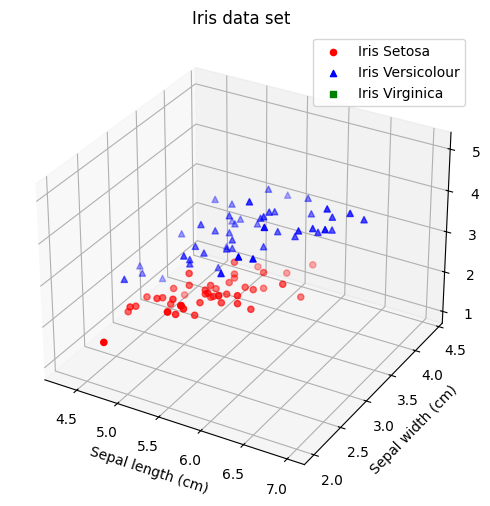

In [14]:


X = df.iloc[:, 0:3].values
y = df.iloc[:, 4].values

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.set_title('Iris data set')

ax.set_xlabel('Sepal length (cm)')
ax.set_ylabel('Sepal width (cm)')
ax.set_zlabel('Petal length (cm)')

ax.scatter(X[y=='Iris-setosa', 0],
           X[y=='Iris-setosa', 1],
           X[y=='Iris-setosa', 2],
           color='red', marker='o', label='Iris Setosa')

ax.scatter(X[y=='Iris-versicolor', 0],
           X[y=='Iris-versicolor', 1],
           X[y=='Iris-versicolor', 2],
           color='blue', marker='^', label='Iris Versicolour')

ax.scatter(X[y=='Iris-virginica', 0],
           X[y=='Iris-virginica', 1],
           X[y=='Iris-virginica', 2],
           color='green', marker='s', label='Iris Virginica')

ax.legend()

plt.show()


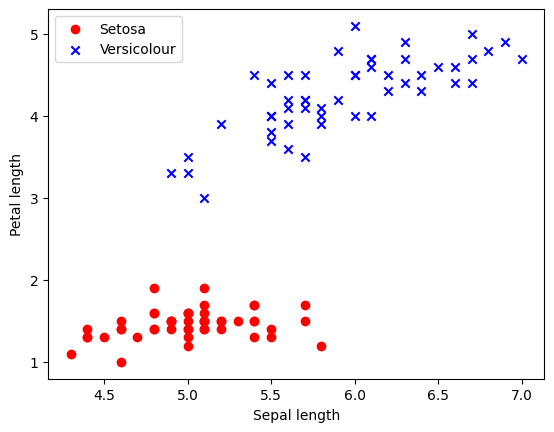

In [13]:




df = df.iloc[0:100]

X = df.iloc[:, [0, 2]].values
y = df.iloc[:, 4].values

plt.scatter(X[y == 'Iris-setosa', 0],
            X[y == 'Iris-setosa', 1],
            color='red', marker='o', label='Setosa')

plt.scatter(X[y == 'Iris-versicolor', 0],
            X[y == 'Iris-versicolor', 1],
            color='blue', marker='x', label='Versicolour')

plt.xlabel('Sepal length')
plt.ylabel('Petal length')
plt.legend()
plt.show()
